TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
# Step 3: Inspect data
print(df1.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [5]:
print(df1.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [6]:
df1.columns = df1.columns.str.strip()

In [7]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1 = df1.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

In [8]:
# Step 6: National-level trend
df_national = df1.groupby('Date')[
    ['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']
].mean().reset_index()

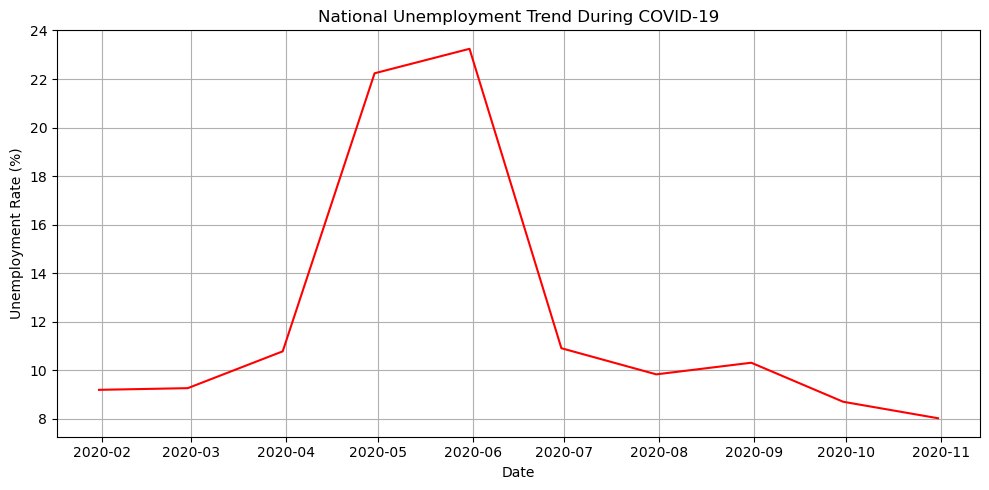

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_national, x='Date', y='Unemployment_Rate', color='red')
plt.title("National Unemployment Trend During COVID-19")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Step 7: Month-wise average unemployment
df1['Month'] = df1['Date'].dt.month
monthly_avg = df1.groupby('Month')['Unemployment_Rate'].mean()

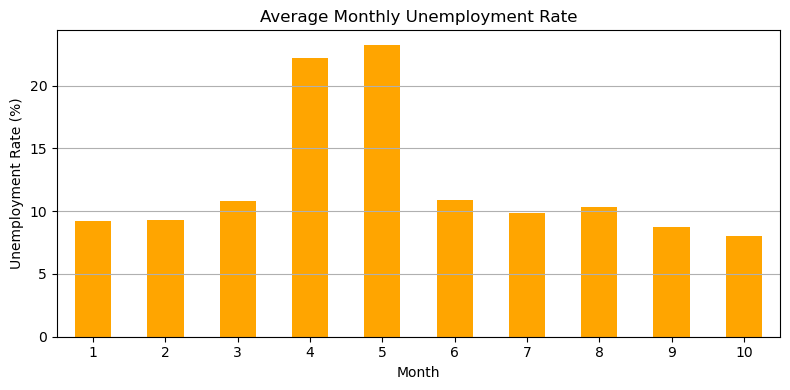

In [11]:
plt.figure(figsize=(8, 4))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Average Monthly Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [12]:
# Ensure column names are stripped and consistent
df1.columns = df1.columns.str.strip()

In [13]:
# Renaming
df1 = df1.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Region': 'Region',  # Ensure Region exists
    'Date': 'Date'
})

In [14]:
# Convert date
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

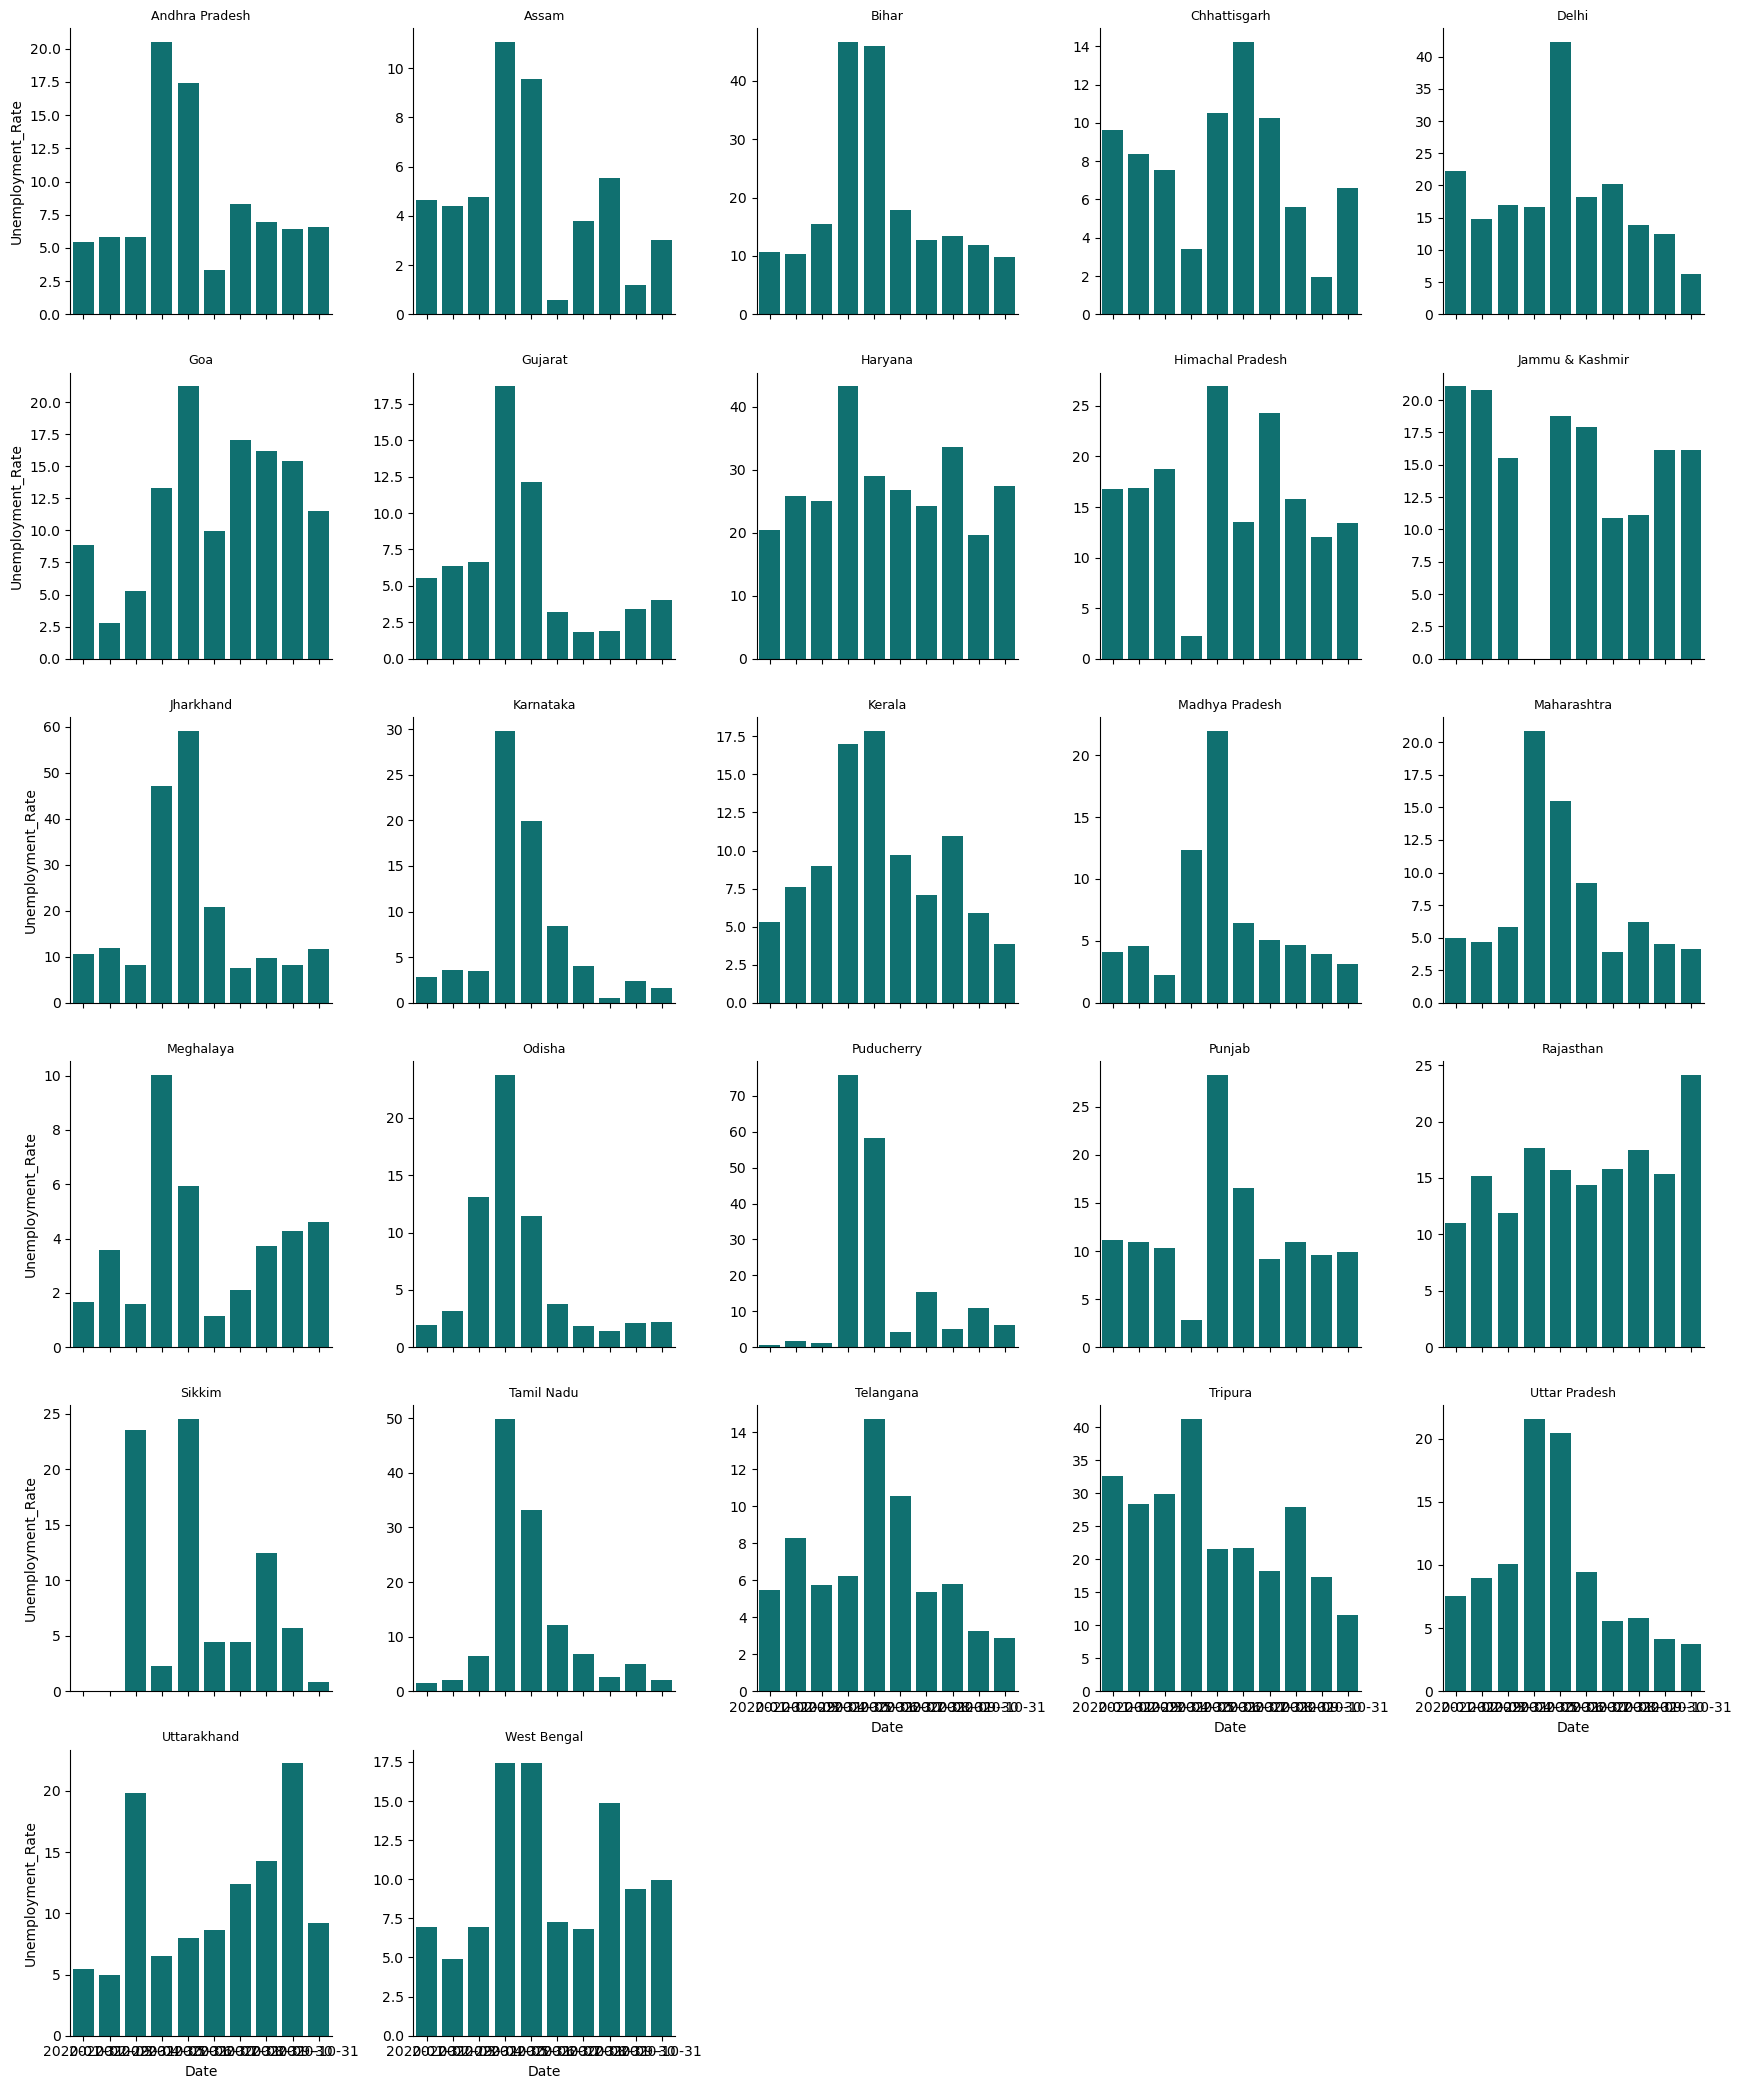

In [15]:
# Now plot
g = sns.FacetGrid(df1, col='Region', col_wrap=5, height=3.5, sharey=False)
g.map_dataframe(sns.barplot, x='Date', y='Unemployment_Rate', color='teal')
g.set_titles(col_template="{col_name}", size=9)

In [16]:
# Rotate x-axis labels
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

In [17]:
g.fig.suptitle("Unemployment Rate by Region", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

<Figure size 640x480 with 0 Axes>